# Introduction

This colab is design to run the pretrained models from [GeoDiff](https://github.com/MinkaiXu/GeoDiff).
The visualization code is inspired by this PyMol [colab](https://colab.research.google.com/gist/iwatobipen/2ec7faeafe5974501e69fcc98c122922/pymol.ipynb#scrollTo=Hm4kY7CaZSlw).

The goal is to generate physically accurate molecules. Given the input of a molecule graph (atom and bond structures with their connectivity -- in the form of a 2d graph). What we want to generate is a stable 3d structure of the molecule.

This colab uses GEOM datasets that have multiple 3d targets per configuration, which provide more compelling targets for generative methods.

> Colab made by [natolambert](https://twitter.com/natolambert).

![diffusers_library](https://github.com/huggingface/diffusers/raw/main/docs/source/imgs/diffusers_library.jpg)


## Installations



### Install Conda

Here we check the `cuda` version of colab. When this was built, the version was always 11.1, which impacts some installation decisions below.

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


Install Conda for some more complex dependencies for geometric networks.

In [ ]:
!pip install -q condacolab

Setup Conda

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


Install pytorch requirements (this takes a few minutes, go grab yourself a coffee 🤗)

In [ ]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.1 -c pytorch-lts -c nvidia
# !conda install pytorch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 cudatoolkit=11.1 -c pytorch -c conda-forge

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.1
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         960 KB

The following packages will be UPDATED:

  conda                               4.14.0-py37h89c1867_0 --> 22.9.0-py37h89c1867_1



conda-22.9.0         | 960 KB    | : 100% 1.0/1 [00:00<00:00,  4.15it/s]
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
Retrieving notices: ...working... 

Need to remove a pathspec for colab that specifies the incorrect cuda version.

In [ ]:
!rm /usr/local/conda-meta/pinned

rm: cannot remove '/usr/local/conda-meta/pinned': No such file or directory


Install torch geometric (used in the model later)

In [ ]:
!conda install -c rusty1s pytorch-geometric=1.7.2

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytorch-geometric=1.7.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    decorator-4.4.2            |             py_0          11 KB  conda-forge
    googledrivedownloader-0.4  |     pyhd3deb0d_1           7 KB  conda-forge
    jinja2-3.1.2               |

### Install Diffusers

In [ ]:
%cd /content

# install latest HF diffusers (will update to the release once added)
!git clone https://github.com/huggingface/diffusers.git
!pip install -q /content/diffusers

# dependencies for diffusers
!pip install -q datasets transformers

/content
Cloning into 'diffusers'...
remote: Enumerating objects: 9298, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 9298 (delta 17), reused 23 (delta 11), pack-reused 9258
Receiving objects: 100% (9298/9298), 7.38 MiB | 5.28 MiB/s, done.
Resolving deltas: 100% (6168/6168), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Check that torch is installed correctly and utilizing the GPU in the colab

In [ ]:
import torch
print(torch.cuda.is_available())
torch.__version__

True


'1.8.2'

### Install Chemistry-specific Dependencies

Install RDKit, a tool for working with and visualizing chemsitry in python (you use this to visualize the generate models later).

In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 34.6 MB/s eta 0:00:00


### Get viewer from nglview

The model you will use outputs a position matrix tensor. This pytorch geometric data object will have many features (positions, known features, edge features -- all tensors).
The data we give to the model will also have a rdmol object (which can extract features to geometric if needed).
The rdmol in this object is a source of ground truth for the generated molecules.

You will use one rendering function from nglviewer later!



In [ ]:
!pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 91.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.1/107.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Create a diffusion model

### Model class(es)

Imports

In [ ]:
# Model adapted from GeoDiff https://github.com/MinkaiXu/GeoDiff
# Model inspired by https://github.com/DeepGraphLearning/torchdrug/tree/master/torchdrug/models
from dataclasses import dataclass
from typing import Callable, Tuple, Union

import numpy as np
import torch
import torch.nn.functional as F
from torch import Tensor, nn
from torch.nn import Embedding, Linear, Module, ModuleList, Sequential

from torch_geometric.nn import MessagePassing, radius, radius_graph
from torch_geometric.typing import Adj, OptPairTensor, OptTensor, Size
from torch_geometric.utils import dense_to_sparse, to_dense_adj
from torch_scatter import scatter_add
from torch_sparse import SparseTensor, coalesce

from diffusers.configuration_utils import ConfigMixin, register_to_config
from diffusers.modeling_utils import ModelMixin
from diffusers.utils import BaseOutput


Helper classes

In [ ]:
@dataclass
class MoleculeGNNOutput(BaseOutput):
    """
    Args:
        sample (`torch.Tensor` of shape `(batch_size, num_channels, height, width)`):
            Hidden states output. Output of last layer of model.
    """

    sample: torch.Tensor


class MultiLayerPerceptron(nn.Module):
    """
    Multi-layer Perceptron. Note there is no activation or dropout in the last layer.
    Args:
        input_dim (int): input dimension
        hidden_dim (list of int): hidden dimensions
        activation (str or function, optional): activation function
        dropout (float, optional): dropout rate
    """

    def __init__(self, input_dim, hidden_dims, activation="relu", dropout=0):
        super(MultiLayerPerceptron, self).__init__()

        self.dims = [input_dim] + hidden_dims
        if isinstance(activation, str):
            self.activation = getattr(F, activation)
        else:
            print(f"Warning, activation passed {activation} is not string and ignored")
            self.activation = None
        if dropout > 0:
            self.dropout = nn.Dropout(dropout)
        else:
            self.dropout = None

        self.layers = nn.ModuleList()
        for i in range(len(self.dims) - 1):
            self.layers.append(nn.Linear(self.dims[i], self.dims[i + 1]))

    def forward(self, x):
        """"""
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers) - 1:
                if self.activation:
                    x = self.activation(x)
                if self.dropout:
                    x = self.dropout(x)
        return x


class ShiftedSoftplus(torch.nn.Module):
    def __init__(self):
        super(ShiftedSoftplus, self).__init__()
        self.shift = torch.log(torch.tensor(2.0)).item()

    def forward(self, x):
        return F.softplus(x) - self.shift


class CFConv(MessagePassing):
    def __init__(self, in_channels, out_channels, num_filters, mlp, cutoff, smooth):
        super(CFConv, self).__init__(aggr="add")
        self.lin1 = Linear(in_channels, num_filters, bias=False)
        self.lin2 = Linear(num_filters, out_channels)
        self.nn = mlp
        self.cutoff = cutoff
        self.smooth = smooth

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.lin1.weight)
        torch.nn.init.xavier_uniform_(self.lin2.weight)
        self.lin2.bias.data.fill_(0)

    def forward(self, x, edge_index, edge_length, edge_attr):
        if self.smooth:
            C = 0.5 * (torch.cos(edge_length * np.pi / self.cutoff) + 1.0)
            C = C * (edge_length <= self.cutoff) * (edge_length >= 0.0)  # Modification: cutoff
        else:
            C = (edge_length <= self.cutoff).float()
        W = self.nn(edge_attr) * C.view(-1, 1)

        x = self.lin1(x)
        x = self.propagate(edge_index, x=x, W=W)
        x = self.lin2(x)
        return x

    def message(self, x_j: torch.Tensor, W) -> torch.Tensor:
        return x_j * W


class InteractionBlock(torch.nn.Module):
    def __init__(self, hidden_channels, num_gaussians, num_filters, cutoff, smooth):
        super(InteractionBlock, self).__init__()
        mlp = Sequential(
            Linear(num_gaussians, num_filters),
            ShiftedSoftplus(),
            Linear(num_filters, num_filters),
        )
        self.conv = CFConv(hidden_channels, hidden_channels, num_filters, mlp, cutoff, smooth)
        self.act = ShiftedSoftplus()
        self.lin = Linear(hidden_channels, hidden_channels)

    def forward(self, x, edge_index, edge_length, edge_attr):
        x = self.conv(x, edge_index, edge_length, edge_attr)
        x = self.act(x)
        x = self.lin(x)
        return x


class SchNetEncoder(Module):
    def __init__(
        self, hidden_channels=128, num_filters=128, num_interactions=6, edge_channels=100, cutoff=10.0, smooth=False
    ):
        super().__init__()

        self.hidden_channels = hidden_channels
        self.num_filters = num_filters
        self.num_interactions = num_interactions
        self.cutoff = cutoff

        self.embedding = Embedding(100, hidden_channels, max_norm=10.0)

        self.interactions = ModuleList()
        for _ in range(num_interactions):
            block = InteractionBlock(hidden_channels, edge_channels, num_filters, cutoff, smooth)
            self.interactions.append(block)

    def forward(self, z, edge_index, edge_length, edge_attr, embed_node=True):
        if embed_node:
            assert z.dim() == 1 and z.dtype == torch.long
            h = self.embedding(z)
        else:
            h = z
        for interaction in self.interactions:
            h = h + interaction(h, edge_index, edge_length, edge_attr)

        return h


class GINEConv(MessagePassing):
    """
    Custom class of the graph isomorphism operator from the "How Powerful are Graph Neural Networks?
    https://arxiv.org/abs/1810.00826 paper. Note that this implementation has the added option of a custom activation.
    """

    def __init__(self, mlp: Callable, eps: float = 0.0, train_eps: bool = False, activation="softplus", **kwargs):
        super(GINEConv, self).__init__(aggr="add", **kwargs)
        self.nn = mlp
        self.initial_eps = eps

        if isinstance(activation, str):
            self.activation = getattr(F, activation)
        else:
            self.activation = None

        if train_eps:
            self.eps = torch.nn.Parameter(torch.Tensor([eps]))
        else:
            self.register_buffer("eps", torch.Tensor([eps]))

    def forward(
        self, x: Union[Tensor, OptPairTensor], edge_index: Adj, edge_attr: OptTensor = None, size: Size = None
    ) -> torch.Tensor:
        """"""
        if isinstance(x, torch.Tensor):
            x: OptPairTensor = (x, x)

        # Node and edge feature dimensionalites need to match.
        if isinstance(edge_index, torch.Tensor):
            assert edge_attr is not None
            assert x[0].size(-1) == edge_attr.size(-1)
        elif isinstance(edge_index, SparseTensor):
            assert x[0].size(-1) == edge_index.size(-1)

        # propagate_type: (x: OptPairTensor, edge_attr: OptTensor)
        out = self.propagate(edge_index, x=x, edge_attr=edge_attr, size=size)

        x_r = x[1]
        if x_r is not None:
            out += (1 + self.eps) * x_r

        return self.nn(out)

    def message(self, x_j: torch.Tensor, edge_attr: torch.Tensor) -> torch.Tensor:
        if self.activation:
            return self.activation(x_j + edge_attr)
        else:
            return x_j + edge_attr

    def __repr__(self):
        return "{}(nn={})".format(self.__class__.__name__, self.nn)


class GINEncoder(torch.nn.Module):
    def __init__(self, hidden_dim, num_convs=3, activation="relu", short_cut=True, concat_hidden=False):
        super().__init__()

        self.hidden_dim = hidden_dim
        self.num_convs = num_convs
        self.short_cut = short_cut
        self.concat_hidden = concat_hidden
        self.node_emb = nn.Embedding(100, hidden_dim)

        if isinstance(activation, str):
            self.activation = getattr(F, activation)
        else:
            self.activation = None

        self.convs = nn.ModuleList()
        for i in range(self.num_convs):
            self.convs.append(
                GINEConv(
                    MultiLayerPerceptron(hidden_dim, [hidden_dim, hidden_dim], activation=activation),
                    activation=activation,
                )
            )

    def forward(self, z, edge_index, edge_attr):
        """
        Input:
            data: (torch_geometric.data.Data): batched graph edge_index: bond indices of the original graph (num_node,
            hidden) edge_attr: edge feature tensor with shape (num_edge, hidden)
        Output:
            node_feature: graph feature
        """

        node_attr = self.node_emb(z)  # (num_node, hidden)

        hiddens = []
        conv_input = node_attr  # (num_node, hidden)

        for conv_idx, conv in enumerate(self.convs):
            hidden = conv(conv_input, edge_index, edge_attr)
            if conv_idx < len(self.convs) - 1 and self.activation is not None:
                hidden = self.activation(hidden)
            assert hidden.shape == conv_input.shape
            if self.short_cut and hidden.shape == conv_input.shape:
                hidden += conv_input

            hiddens.append(hidden)
            conv_input = hidden

        if self.concat_hidden:
            node_feature = torch.cat(hiddens, dim=-1)
        else:
            node_feature = hiddens[-1]

        return node_feature


class MLPEdgeEncoder(Module):
    def __init__(self, hidden_dim=100, activation="relu"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.bond_emb = Embedding(100, embedding_dim=self.hidden_dim)
        self.mlp = MultiLayerPerceptron(1, [self.hidden_dim, self.hidden_dim], activation=activation)

    @property
    def out_channels(self):
        return self.hidden_dim

    def forward(self, edge_length, edge_type):
        """
        Input:
            edge_length: The length of edges, shape=(E, 1). edge_type: The type pf edges, shape=(E,)
        Returns:
            edge_attr: The representation of edges. (E, 2 * num_gaussians)
        """
        d_emb = self.mlp(edge_length)  # (num_edge, hidden_dim)
        edge_attr = self.bond_emb(edge_type)  # (num_edge, hidden_dim)
        return d_emb * edge_attr  # (num_edge, hidden)


def assemble_atom_pair_feature(node_attr, edge_index, edge_attr):
    h_row, h_col = node_attr[edge_index[0]], node_attr[edge_index[1]]
    h_pair = torch.cat([h_row * h_col, edge_attr], dim=-1)  # (E, 2H)
    return h_pair


def _extend_graph_order(num_nodes, edge_index, edge_type, order=3):
    """
    Args:
        num_nodes:  Number of atoms.
        edge_index: Bond indices of the original graph.
        edge_type:  Bond types of the original graph.
        order:  Extension order.
    Returns:
        new_edge_index: Extended edge indices. new_edge_type: Extended edge types.
    """

    def binarize(x):
        return torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))

    def get_higher_order_adj_matrix(adj, order):
        """
        Args:
            adj:        (N, N)
            type_mat:   (N, N)
        Returns:
            Following attributes will be updated:
              - edge_index
              - edge_type
            Following attributes will be added to the data object:
              - bond_edge_index: Original edge_index.
        """
        adj_mats = [
            torch.eye(adj.size(0), dtype=torch.long, device=adj.device),
            binarize(adj + torch.eye(adj.size(0), dtype=torch.long, device=adj.device)),
        ]

        for i in range(2, order + 1):
            adj_mats.append(binarize(adj_mats[i - 1] @ adj_mats[1]))
        order_mat = torch.zeros_like(adj)

        for i in range(1, order + 1):
            order_mat += (adj_mats[i] - adj_mats[i - 1]) * i

        return order_mat

    num_types = 22
    # given from len(BOND_TYPES), where BOND_TYPES = {t: i for i, t in enumerate(BT.names.values())}
    # from rdkit.Chem.rdchem import BondType as BT
    N = num_nodes
    adj = to_dense_adj(edge_index).squeeze(0)
    adj_order = get_higher_order_adj_matrix(adj, order)  # (N, N)

    type_mat = to_dense_adj(edge_index, edge_attr=edge_type).squeeze(0)  # (N, N)
    type_highorder = torch.where(adj_order > 1, num_types + adj_order - 1, torch.zeros_like(adj_order))
    assert (type_mat * type_highorder == 0).all()
    type_new = type_mat + type_highorder

    new_edge_index, new_edge_type = dense_to_sparse(type_new)
    _, edge_order = dense_to_sparse(adj_order)

    # data.bond_edge_index = data.edge_index  # Save original edges
    new_edge_index, new_edge_type = coalesce(new_edge_index, new_edge_type.long(), N, N)  # modify data

    return new_edge_index, new_edge_type


def _extend_to_radius_graph(pos, edge_index, edge_type, cutoff, batch, unspecified_type_number=0, is_sidechain=None):
    assert edge_type.dim() == 1
    N = pos.size(0)

    bgraph_adj = torch.sparse.LongTensor(edge_index, edge_type, torch.Size([N, N]))

    if is_sidechain is None:
        rgraph_edge_index = radius_graph(pos, r=cutoff, batch=batch)  # (2, E_r)
    else:
        # fetch sidechain and its batch index
        is_sidechain = is_sidechain.bool()
        dummy_index = torch.arange(pos.size(0), device=pos.device)
        sidechain_pos = pos[is_sidechain]
        sidechain_index = dummy_index[is_sidechain]
        sidechain_batch = batch[is_sidechain]

        assign_index = radius(x=pos, y=sidechain_pos, r=cutoff, batch_x=batch, batch_y=sidechain_batch)
        r_edge_index_x = assign_index[1]
        r_edge_index_y = assign_index[0]
        r_edge_index_y = sidechain_index[r_edge_index_y]

        rgraph_edge_index1 = torch.stack((r_edge_index_x, r_edge_index_y))  # (2, E)
        rgraph_edge_index2 = torch.stack((r_edge_index_y, r_edge_index_x))  # (2, E)
        rgraph_edge_index = torch.cat((rgraph_edge_index1, rgraph_edge_index2), dim=-1)  # (2, 2E)
        # delete self loop
        rgraph_edge_index = rgraph_edge_index[:, (rgraph_edge_index[0] != rgraph_edge_index[1])]

    rgraph_adj = torch.sparse.LongTensor(
        rgraph_edge_index,
        torch.ones(rgraph_edge_index.size(1)).long().to(pos.device) * unspecified_type_number,
        torch.Size([N, N]),
    )

    composed_adj = (bgraph_adj + rgraph_adj).coalesce()  # Sparse (N, N, T)

    new_edge_index = composed_adj.indices()
    new_edge_type = composed_adj.values().long()

    return new_edge_index, new_edge_type


def extend_graph_order_radius(
    num_nodes,
    pos,
    edge_index,
    edge_type,
    batch,
    order=3,
    cutoff=10.0,
    extend_order=True,
    extend_radius=True,
    is_sidechain=None,
):
    if extend_order:
        edge_index, edge_type = _extend_graph_order(
            num_nodes=num_nodes, edge_index=edge_index, edge_type=edge_type, order=order
        )

    if extend_radius:
        edge_index, edge_type = _extend_to_radius_graph(
            pos=pos, edge_index=edge_index, edge_type=edge_type, cutoff=cutoff, batch=batch, is_sidechain=is_sidechain
        )

    return edge_index, edge_type


def get_distance(pos, edge_index):
    return (pos[edge_index[0]] - pos[edge_index[1]]).norm(dim=-1)


def graph_field_network(score_d, pos, edge_index, edge_length):
    """
    Transformation to make the epsilon predicted from the diffusion model roto-translational equivariant. See equations
    5-7 of the GeoDiff Paper https://arxiv.org/pdf/2203.02923.pdf
    """
    N = pos.size(0)
    dd_dr = (1.0 / edge_length) * (pos[edge_index[0]] - pos[edge_index[1]])  # (E, 3)
    score_pos = scatter_add(dd_dr * score_d, edge_index[0], dim=0, dim_size=N) + scatter_add(
        -dd_dr * score_d, edge_index[1], dim=0, dim_size=N
    )  # (N, 3)
    return score_pos


def clip_norm(vec, limit, p=2):
    norm = torch.norm(vec, dim=-1, p=2, keepdim=True)
    denom = torch.where(norm > limit, limit / norm, torch.ones_like(norm))
    return vec * denom


def is_local_edge(edge_type):
    return edge_type > 0


Main model class!

In [ ]:
class MoleculeGNN(ModelMixin, ConfigMixin):
    @register_to_config
    def __init__(
        self,
        hidden_dim=128,
        num_convs=6,
        num_convs_local=4,
        cutoff=10.0,
        mlp_act="relu",
        edge_order=3,
        edge_encoder="mlp",
        smooth_conv=True,
    ):
        super().__init__()
        self.cutoff = cutoff
        self.edge_encoder = edge_encoder
        self.edge_order = edge_order

        """
        edge_encoder: Takes both edge type and edge length as input and outputs a vector [Note]: node embedding is done
        in SchNetEncoder
        """
        self.edge_encoder_global = MLPEdgeEncoder(hidden_dim, mlp_act)  # get_edge_encoder(config)
        self.edge_encoder_local = MLPEdgeEncoder(hidden_dim, mlp_act)  # get_edge_encoder(config)

        """
        The graph neural network that extracts node-wise features.
        """
        self.encoder_global = SchNetEncoder(
            hidden_channels=hidden_dim,
            num_filters=hidden_dim,
            num_interactions=num_convs,
            edge_channels=self.edge_encoder_global.out_channels,
            cutoff=cutoff,
            smooth=smooth_conv,
        )
        self.encoder_local = GINEncoder(
            hidden_dim=hidden_dim,
            num_convs=num_convs_local,
        )

        """
        `output_mlp` takes a mixture of two nodewise features and edge features as input and outputs
            gradients w.r.t. edge_length (out_dim = 1).
        """
        self.grad_global_dist_mlp = MultiLayerPerceptron(
            2 * hidden_dim, [hidden_dim, hidden_dim // 2, 1], activation=mlp_act
        )

        self.grad_local_dist_mlp = MultiLayerPerceptron(
            2 * hidden_dim, [hidden_dim, hidden_dim // 2, 1], activation=mlp_act
        )

        """
        Incorporate parameters together
        """
        self.model_global = nn.ModuleList([self.edge_encoder_global, self.encoder_global, self.grad_global_dist_mlp])
        self.model_local = nn.ModuleList([self.edge_encoder_local, self.encoder_local, self.grad_local_dist_mlp])

    def _forward(
        self,
        atom_type,
        pos,
        bond_index,
        bond_type,
        batch,
        time_step,  # NOTE, model trained without timestep performed best
        edge_index=None,
        edge_type=None,
        edge_length=None,
        return_edges=False,
        extend_order=True,
        extend_radius=True,
        is_sidechain=None,
    ):
        """
        Args:
            atom_type:  Types of atoms, (N, ).
            bond_index: Indices of bonds (not extended, not radius-graph), (2, E).
            bond_type:  Bond types, (E, ).
            batch:      Node index to graph index, (N, ).
        """
        N = atom_type.size(0)
        if edge_index is None or edge_type is None or edge_length is None:
            edge_index, edge_type = extend_graph_order_radius(
                num_nodes=N,
                pos=pos,
                edge_index=bond_index,
                edge_type=bond_type,
                batch=batch,
                order=self.edge_order,
                cutoff=self.cutoff,
                extend_order=extend_order,
                extend_radius=extend_radius,
                is_sidechain=is_sidechain,
            )
            edge_length = get_distance(pos, edge_index).unsqueeze(-1)  # (E, 1)
        local_edge_mask = is_local_edge(edge_type)  # (E, )

        # with the parameterization of NCSNv2
        # DDPM loss implicit handle the noise variance scale conditioning
        sigma_edge = torch.ones(size=(edge_index.size(1), 1), device=pos.device)  # (E, 1)

        # Encoding global
        edge_attr_global = self.edge_encoder_global(edge_length=edge_length, edge_type=edge_type)  # Embed edges

        # Global
        node_attr_global = self.encoder_global(
            z=atom_type,
            edge_index=edge_index,
            edge_length=edge_length,
            edge_attr=edge_attr_global,
        )
        # Assemble pairwise features
        h_pair_global = assemble_atom_pair_feature(
            node_attr=node_attr_global,
            edge_index=edge_index,
            edge_attr=edge_attr_global,
        )  # (E_global, 2H)
        # Invariant features of edges (radius graph, global)
        edge_inv_global = self.grad_global_dist_mlp(h_pair_global) * (1.0 / sigma_edge)  # (E_global, 1)

        # Encoding local
        edge_attr_local = self.edge_encoder_global(edge_length=edge_length, edge_type=edge_type)  # Embed edges
        # edge_attr += temb_edge

        # Local
        node_attr_local = self.encoder_local(
            z=atom_type,
            edge_index=edge_index[:, local_edge_mask],
            edge_attr=edge_attr_local[local_edge_mask],
        )
        # Assemble pairwise features
        h_pair_local = assemble_atom_pair_feature(
            node_attr=node_attr_local,
            edge_index=edge_index[:, local_edge_mask],
            edge_attr=edge_attr_local[local_edge_mask],
        )  # (E_local, 2H)

        # Invariant features of edges (bond graph, local)
        if isinstance(sigma_edge, torch.Tensor):
            edge_inv_local = self.grad_local_dist_mlp(h_pair_local) * (
                1.0 / sigma_edge[local_edge_mask]
            )  # (E_local, 1)
        else:
            edge_inv_local = self.grad_local_dist_mlp(h_pair_local) * (1.0 / sigma_edge)  # (E_local, 1)

        if return_edges:
            return edge_inv_global, edge_inv_local, edge_index, edge_type, edge_length, local_edge_mask
        else:
            return edge_inv_global, edge_inv_local

    def forward(
        self,
        sample,
        timestep: Union[torch.Tensor, float, int],
        return_dict: bool = True,
        sigma=1.0,
        global_start_sigma=0.5,
        w_global=1.0,
        extend_order=False,
        extend_radius=True,
        clip_local=None,
        clip_global=1000.0,
    ) -> Union[MoleculeGNNOutput, Tuple]:
        r"""
        Args:
            sample: packed torch geometric object
            timestep (`torch.Tensor` or `float` or `int): TODO verify type and shape (batch) timesteps
            return_dict (`bool`, *optional*, defaults to `True`):
                Whether or not to return a [`~models.molecule_gnn.MoleculeGNNOutput`] instead of a plain tuple.
        Returns:
            [`~models.molecule_gnn.MoleculeGNNOutput`] or `tuple`: [`~models.molecule_gnn.MoleculeGNNOutput`] if
            `return_dict` is True, otherwise a `tuple`. When returning a tuple, the first element is the sample tensor.
        """

        # unpack sample
        atom_type = sample.atom_type
        bond_index = sample.edge_index
        bond_type = sample.edge_type
        num_graphs = sample.num_graphs
        pos = sample.pos

        timesteps = torch.full(size=(num_graphs,), fill_value=timestep, dtype=torch.long, device=pos.device)

        edge_inv_global, edge_inv_local, edge_index, edge_type, edge_length, local_edge_mask = self._forward(
            atom_type=atom_type,
            pos=sample.pos,
            bond_index=bond_index,
            bond_type=bond_type,
            batch=sample.batch,
            time_step=timesteps,
            return_edges=True,
            extend_order=extend_order,
            extend_radius=extend_radius,
        )  # (E_global, 1), (E_local, 1)

        # Important equation in the paper for equivariant features - eqns 5-7 of GeoDiff
        node_eq_local = graph_field_network(
            edge_inv_local, pos, edge_index[:, local_edge_mask], edge_length[local_edge_mask]
        )
        if clip_local is not None:
            node_eq_local = clip_norm(node_eq_local, limit=clip_local)

        # Global
        if sigma < global_start_sigma:
            edge_inv_global = edge_inv_global * (1 - local_edge_mask.view(-1, 1).float())
            node_eq_global = graph_field_network(edge_inv_global, pos, edge_index, edge_length)
            node_eq_global = clip_norm(node_eq_global, limit=clip_global)
        else:
            node_eq_global = 0

        # Sum
        eps_pos = node_eq_local + node_eq_global * w_global

        if not return_dict:
            return (-eps_pos,)

        return MoleculeGNNOutput(sample=torch.Tensor(-eps_pos).to(pos.device))

### Load pretrained model

#### Load a model
The model used is a design an
equivariant convolutional layer, named graph field network (GFN).

The warning about `betas` and `alphas` can be ignored, those were moved to the scheduler.

In [ ]:
DEVICE = 'cuda'
model = MoleculeGNN.from_pretrained("fusing/gfn-molecule-gen-drugs").to(DEVICE)

Downloading:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/401 [00:00<?, ?B/s]

The config attributes {'type': 'diffusion', 'network': 'dualenc', 'beta_schedule': 'sigmoid', 'beta_start': 1e-07, 'beta_end': 0.002, 'num_diffusion_timesteps': 5000} were passed to MoleculeGNN, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint at fusing/gfn-molecule-gen-drugs were not used when initializing MoleculeGNN: ['betas', 'alphas']
- This IS expected if you are initializing MoleculeGNN from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MoleculeGNN from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The warnings above are because the pre-trained model was uploaded before cleaning the code!

#### Create scheduler
Note, other schedulers are used in the paper for slightly improved performance over DDPM.

In [ ]:
from diffusers import DDPMScheduler

In [ ]:
num_timesteps = 1000
scheduler = DDPMScheduler(num_train_timesteps=num_timesteps,beta_schedule="sigmoid",beta_start=1e-7, beta_end=2e-3, clip_sample=False)

### Get a dataset

Grab a google tool so we can upload our data directly. Note you need to download the data from ***this [file](https://huggingface.co/datasets/fusing/geodiff-example-data/blob/main/data/molecules.pkl)***

(direct downloading from the hub does not yet work for this datatype)

In [ ]:
# from google.colab import files

In [ ]:
# uploaded = files.upload()

Load the dataset with torch.

In [ ]:
import torch
import numpy as np

!wget https://huggingface.co/datasets/fusing/geodiff-example-data/resolve/main/data/molecules.pkl
dataset = torch.load('/content/molecules.pkl')

--2022-10-12 18:32:19--  https://huggingface.co/datasets/fusing/geodiff-example-data/resolve/main/data/molecules.pkl
Resolving huggingface.co (huggingface.co)... 44.195.102.200, 52.5.54.249, 54.210.225.113, ...
Connecting to huggingface.co (huggingface.co)|44.195.102.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127774 (125K) [application/octet-stream]
Saving to: ‘molecules.pkl’

molecules.pkl       100%[===================>] 124.78K   180KB/s    in 0.7s    

2022-10-12 18:32:20 (180 KB/s) - ‘molecules.pkl’ saved [127774/127774]



Print out one entry of the dataset, it contains molecular formulas, atom types, positions, and more.

In [ ]:
dataset[0]

Data(atom_type=[51], bond_edge_index=[2, 108], edge_index=[2, 598], edge_order=[598], edge_type=[598], idx=[1], is_bond=[598], num_nodes_per_graph=[1], num_pos_ref=[1], nx=, pos=[51, 3], pos_ref=[255, 3], rdmol=<rdkit.Chem.rdchem.Mol object at 0x7f707d2cb130>, smiles="CC1CCCN(C(=O)C2CCN(S(=O)(=O)c3cccc4nonc34)CC2)C1")

## Run the diffusion process

#### Helper Functions

In [ ]:
from torch_geometric.data import Data, Batch
from torch_scatter import scatter_add, scatter_mean
from tqdm import tqdm
import copy
import os

def repeat_data(data: Data, num_repeat) -> Batch:
    datas = [copy.deepcopy(data) for i in range(num_repeat)]
    return Batch.from_data_list(datas)

def repeat_batch(batch: Batch, num_repeat) -> Batch:
    datas = batch.to_data_list()
    new_data = []
    for i in range(num_repeat):
        new_data += copy.deepcopy(datas)
    return Batch.from_data_list(new_data)

#### Constants

In [ ]:
num_samples = 1 # solutions per molecule
num_molecules = 3

DEVICE = 'cuda'
sampling_type = 'ddpm_noisy' #'' # paper also uses "generalize" and "ld"
# constants for inference
w_global = 0.5 #0,.3 for qm9
global_start_sigma = 0.5
eta = 1.0
clip_local = None
clip_pos = None

# constands for data handling
save_traj = False
save_data = False
output_dir = '/content/'

#### Generate samples!
Note that the 3d representation of a molecule is referred to as the **conformation**

In [ ]:
results = []

# define sigmas
sigmas = torch.tensor(1.0 - scheduler.alphas_cumprod).sqrt() / torch.tensor(scheduler.alphas_cumprod).sqrt()
sigmas = sigmas.to(DEVICE)

for count, data in enumerate(tqdm(dataset)):
    num_samples = max(data.pos_ref.size(0) // data.num_nodes, 1)

    data_input = data.clone()
    data_input['pos_ref'] = None
    batch = repeat_data(data_input, num_samples).to(DEVICE)

    # initial configuration
    pos_init = torch.randn(batch.num_nodes, 3).to(DEVICE)

    # for logging animation of denoising
    pos_traj = []
    with torch.no_grad():

        # scale initial sample
        pos = pos_init * sigmas[-1]
        for t in scheduler.timesteps:
            batch.pos = pos

            # generate geometry with model, then filter it
            epsilon = model.forward(batch, t, sigma=sigmas[t], return_dict=False)[0]

            # Update
            reconstructed_pos = scheduler.step(epsilon, t, pos)["prev_sample"].to(DEVICE)

            pos = reconstructed_pos

            if torch.isnan(pos).any():
                print("NaN detected. Please restart.")
                raise FloatingPointError()

            # recenter graph of positions for next iteration
            pos = pos - scatter_mean(pos, batch.batch, dim=0)[batch.batch]

            # optional clipping
            if clip_pos is not None:
                pos = torch.clamp(pos, min=-clip_pos, max=clip_pos)
            pos_traj.append(pos.clone().cpu())

    pos_gen = pos.cpu()
    if save_traj:
        pos_gen_traj = pos_traj.cpu()
        data.pos_gen = torch.stack(pos_gen_traj)
    else:
        data.pos_gen = pos_gen
    results.append(data)


if save_data:
  save_path = os.path.join(output_dir, 'samples_all.pkl')

  with open(save_path, 'wb') as f:
      pickle.dump(results, f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
100%|██████████| 5/5 [00:55<00:00, 11.06s/it]


## Render the results!

This function allows us to render 3d in colab.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

### Helper functions

Here is a helper function for copying the generated tensors into a format used by RDKit & NGLViewer.

In [ ]:
from copy import deepcopy
def set_rdmol_positions(rdkit_mol, pos):
    """
    Args:
        rdkit_mol:  An `rdkit.Chem.rdchem.Mol` object.
        pos: (N_atoms, 3)
    """
    mol = deepcopy(rdkit_mol)
    set_rdmol_positions_(mol, pos)
    return mol

def set_rdmol_positions_(mol, pos):
    """
    Args:
        rdkit_mol:  An `rdkit.Chem.rdchem.Mol` object.
        pos: (N_atoms, 3)
    """
    for i in range(pos.shape[0]):
        mol.GetConformer(0).SetAtomPosition(i, pos[i].tolist())
    return mol


Process the generated data to make it easy to view.

In [ ]:
# the model can generate multiple conformations per 2d geometry
num_gen = results[0]['pos_gen'].shape[0]

# init storage objects
mols_gen = []
mols_orig = []
for to_process in results:

    # store the reference 3d position
    to_process['pos_ref'] = to_process['pos_ref'].reshape(-1, to_process['rdmol'].GetNumAtoms(), 3)

    # store the generated 3d position
    to_process['pos_gen'] = to_process['pos_gen'].reshape(-1, to_process['rdmol'].GetNumAtoms(), 3)

    # copy data to new object
    new_mol = set_rdmol_positions(to_process.rdmol, to_process['pos_gen'][0])

    # append results
    mols_gen.append(new_mol)
    mols_orig.append(to_process.rdmol)

print(f"collect {len(mols_gen)} generated molecules in `mols`")

collect 5 generated molecules in `mols`


Import tools to visualize the 2d chemical diagram of the molecule.

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D as MD2
from IPython.display import SVG, display

Select molecule to visualize

In [ ]:
idx = 0
assert idx < len(results), "selected molecule that was not generated"

### Viewing

This 2D rendering is the equivalent of the **input to the model**!

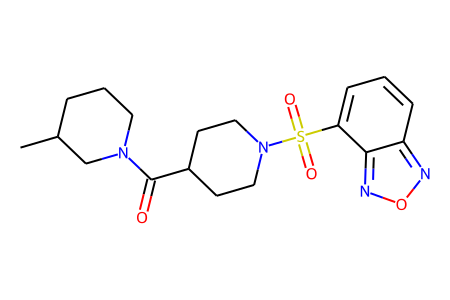

In [ ]:
mc = Chem.MolFromSmiles(dataset[0]['smiles'])
molSize=(450,300)
drawer = MD2.MolDraw2DSVG(molSize[0],molSize[1])
drawer.DrawMolecule(mc)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
display(SVG(svg.replace('svg:','')))

Generate the 3d molecule!

In [ ]:
from nglview import show_rdkit as show

In [ ]:
# new molecule
show(mols_gen[idx])

NGLWidget()